----------------------Linear Regression Model--------------------------------------

Coefficients: 
 [[-0.00168107]]
Intercept: 
 [0.08718679]
----------------------Polynomial Regression Model------------------------------

 Coefficients: 
 [[ 1.00000000e+00 -5.00000000e-01  2.50000000e-01]
 [ 1.00000000e+00 -4.94974874e-01  2.45000126e-01]
 [ 1.00000000e+00 -4.89949749e-01  2.40050756e-01]
 [ 1.00000000e+00 -4.84924623e-01  2.35151890e-01]
 [ 1.00000000e+00 -4.79899497e-01  2.30303528e-01]
 [ 1.00000000e+00 -4.74874372e-01  2.25505669e-01]
 [ 1.00000000e+00 -4.69849246e-01  2.20758314e-01]
 [ 1.00000000e+00 -4.64824121e-01  2.16061463e-01]
 [ 1.00000000e+00 -4.59798995e-01  2.11415116e-01]
 [ 1.00000000e+00 -4.54773869e-01  2.06819272e-01]
 [ 1.00000000e+00 -4.49748744e-01  2.02273932e-01]
 [ 1.00000000e+00 -4.44723618e-01  1.97779096e-01]
 [ 1.00000000e+00 -4.39698492e-01  1.93334764e-01]
 [ 1.00000000e+00 -4.34673367e-01  1.88940936e-01]
 [ 1.00000000e+00 -4.29648241e-01  1.84597611

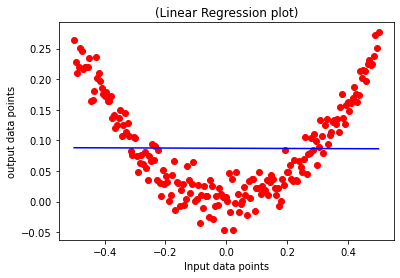

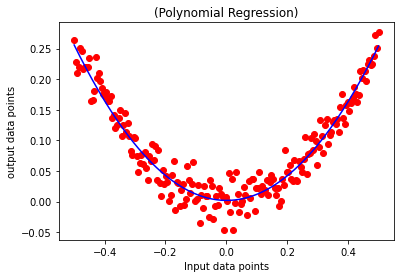

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense


print('----------------------Linear Regression Model--------------------------------------\n')

# a. Establish a linear regression model to predict y data (you can use sklearn)
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

#create linear regression object
LM = LinearRegression()

# Train the model using the training sets
LM.fit(x_data, y_data)

# The coefficients
print('Coefficients: \n', LM.coef_)

# The Intercept
print('Intercept: \n', LM.intercept_)


print('----------------------Polynomial Regression Model------------------------------\n')

# b. Establish a polynomial model with highest power of 2 to predict y data (you can use sklearn).
PM=PolynomialFeatures(degree=2)
x_poly=PM.fit_transform(x_data)
PM.fit(x_poly,y_data)
# Create linear regression model to plot polynomial regression model
LM2=LinearRegression()
LM2.fit(x_poly,y_data)

print(' Coefficients: \n', x_poly)

print('\n ---------------------Neural network model-------------------------\n')
# c. Establish a three-layer (including input, 1 hidden (6 nodes) and output layer) neural
# network to predict y data (keras or tensorflow is recommended). Split the dataset into
# training 80% and testing data 20% using the following code in Python:

# Split train and test data for both input and output
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2,
random_state = 0)

# define the keras model
kModel = Sequential()
kModel.add(Dense(1, input_dim=1, activation='relu'))
kModel.add(Dense(6, activation='relu'))
kModel.add(Dense(1, activation='sigmoid'))

# compile the keras model
kModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mse'])
# fit the keras model on the dataset
kModel.fit(x_train, y_train, epochs=150, batch_size=10)


print('\n -----------Linear, polynomial, neural model- mean squared error-------------\n')
# d. Calculate and compare mean squared errors of three models in 1.1 (a), (b) and (c).
# The mean squared error of Linear regression model
y_data_pred = LM.predict(x_data)
print('Linear Mean squared error: %.4f' % mean_squared_error(y_data, y_data_pred, squared=True))

# The mean squared error of Polynomial regression model
y_poly_pred = LM2.predict(PM.fit_transform(x_data))
print('Polynomial Mean squared error: %.4f' % mean_squared_error(y_data, y_poly_pred, squared=True))

# The mean squared error of Neural network - keras model
_, mse = kModel.evaluate(x_test, y_test)
print('Neural Mean squared error: %.4f' % mse)

print('\n -----------Plot Linear and polynomial regression model-------------\n')
# e. Plot data points and curve of predictions in 1.1 (a) and 1.1 (b).
plt.scatter(x_data,y_data,color='red')
plt.plot(x_data,LM.predict(x_data),color='blue')
plt.title('(Linear Regression plot)')
plt.xlabel('Input data points')
plt.ylabel('output data points')
plt.show()

plt.scatter(x_data,y_data,color='red')
plt.plot(x_data,LM2.predict(PM.fit_transform(x_data)),color='blue')
plt.title('(Polynomial Regression)')
plt.xlabel('Input data points')
plt.ylabel('output data points')
plt.show()